## Arboles de decision
En esta notebook se presenta un ejemplo de como usar arboles de decision para clasificacion y regresion. Se usa el dataset de diabetes
### 1. Imports y carga de datos

In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

# Nombre del archivo adjunto
file_path = 'diabetes.csv'

# 1. Cargar el dataset
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{file_path}'. Asegúrate de que esté adjunto correctamente.")
    exit()

# Inspeccionar las primeras filas y los nombres de las columnas
print("Primeras 5 filas del dataset:")
print(df.head())
print("\nColumnas del dataset:", df.columns.tolist())


Primeras 5 filas del dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Diabetes  
0                     627.0   50         1  
1                     351.0   31         0  
2                     672.0   32         1  
3                     167.0   21         0  
4                    2288.0   33         1  

Columnas del dataset: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes']


### 2. Definir las características (X) y la variable objetivo (y)
Asumiendo que la columna 'Diabetes' es la variable objetivo (0=No Diabetes, 1=Diabetes) y el resto son características.

In [ ]:
target_column = 'Outcome' # Columna objetivo para el Pima Indians Dataset
if target_column not in df.columns:
    # A veces se llama 'Diabetes' o 'Y', ajustamos la suposición
    if 'Diabetes' in df.columns:
        target_column = 'Diabetes'
    else:
        print("\nAdvertencia: No se encontró la columna 'Outcome' o 'Diabetes'. Usando la última columna.")
        target_column = df.columns[-1]

X = df.drop(columns=[target_column])
y = df[target_column]

feature_names = X.columns.tolist()
class_names = ['No Diabetes (0)', 'Diabetes (1)']
print(f"\nColumna objetivo: {target_column} con clases {y.unique()}")
print(f"Características (Features): {feature_names}")



Columna objetivo: Diabetes con clases [1 0]
Características (Features): ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


### 3. Entrenamiento del modelo

In [5]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# Usamos 'stratify=y' para mantener la proporción de clases en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar el Árbol de Decisión (Decision Tree - DT)
# Limitamos la profundidad máxima (max_depth) para que el gráfico sea legible
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### 4. Testing: El Reporte de las Clasificaciones

In [6]:
# Predecir y generar el Reporte de Clasificación
y_pred = dt_classifier.predict(X_test)

print("\n" + "="*70)
print("REPORTE DE CLASIFICACIÓN DEL ÁRBOL DE DECISIÓN (Dataset adjunto)")
print("="*70)
print(classification_report(y_test, y_pred, target_names=class_names))
print("="*70)
print(f"Precisión (Accuracy) en el conjunto de prueba: {dt_classifier.score(X_test, y_test):.4f}")
print("="*70)


REPORTE DE CLASIFICACIÓN DEL ÁRBOL DE DECISIÓN (Dataset adjunto)
                 precision    recall  f1-score   support

No Diabetes (0)       0.78      0.95      0.85       150
   Diabetes (1)       0.83      0.49      0.62        81

       accuracy                           0.79       231
      macro avg       0.80      0.72      0.74       231
   weighted avg       0.80      0.79      0.77       231

Precisión (Accuracy) en el conjunto de prueba: 0.7879


### 5. Gráfica

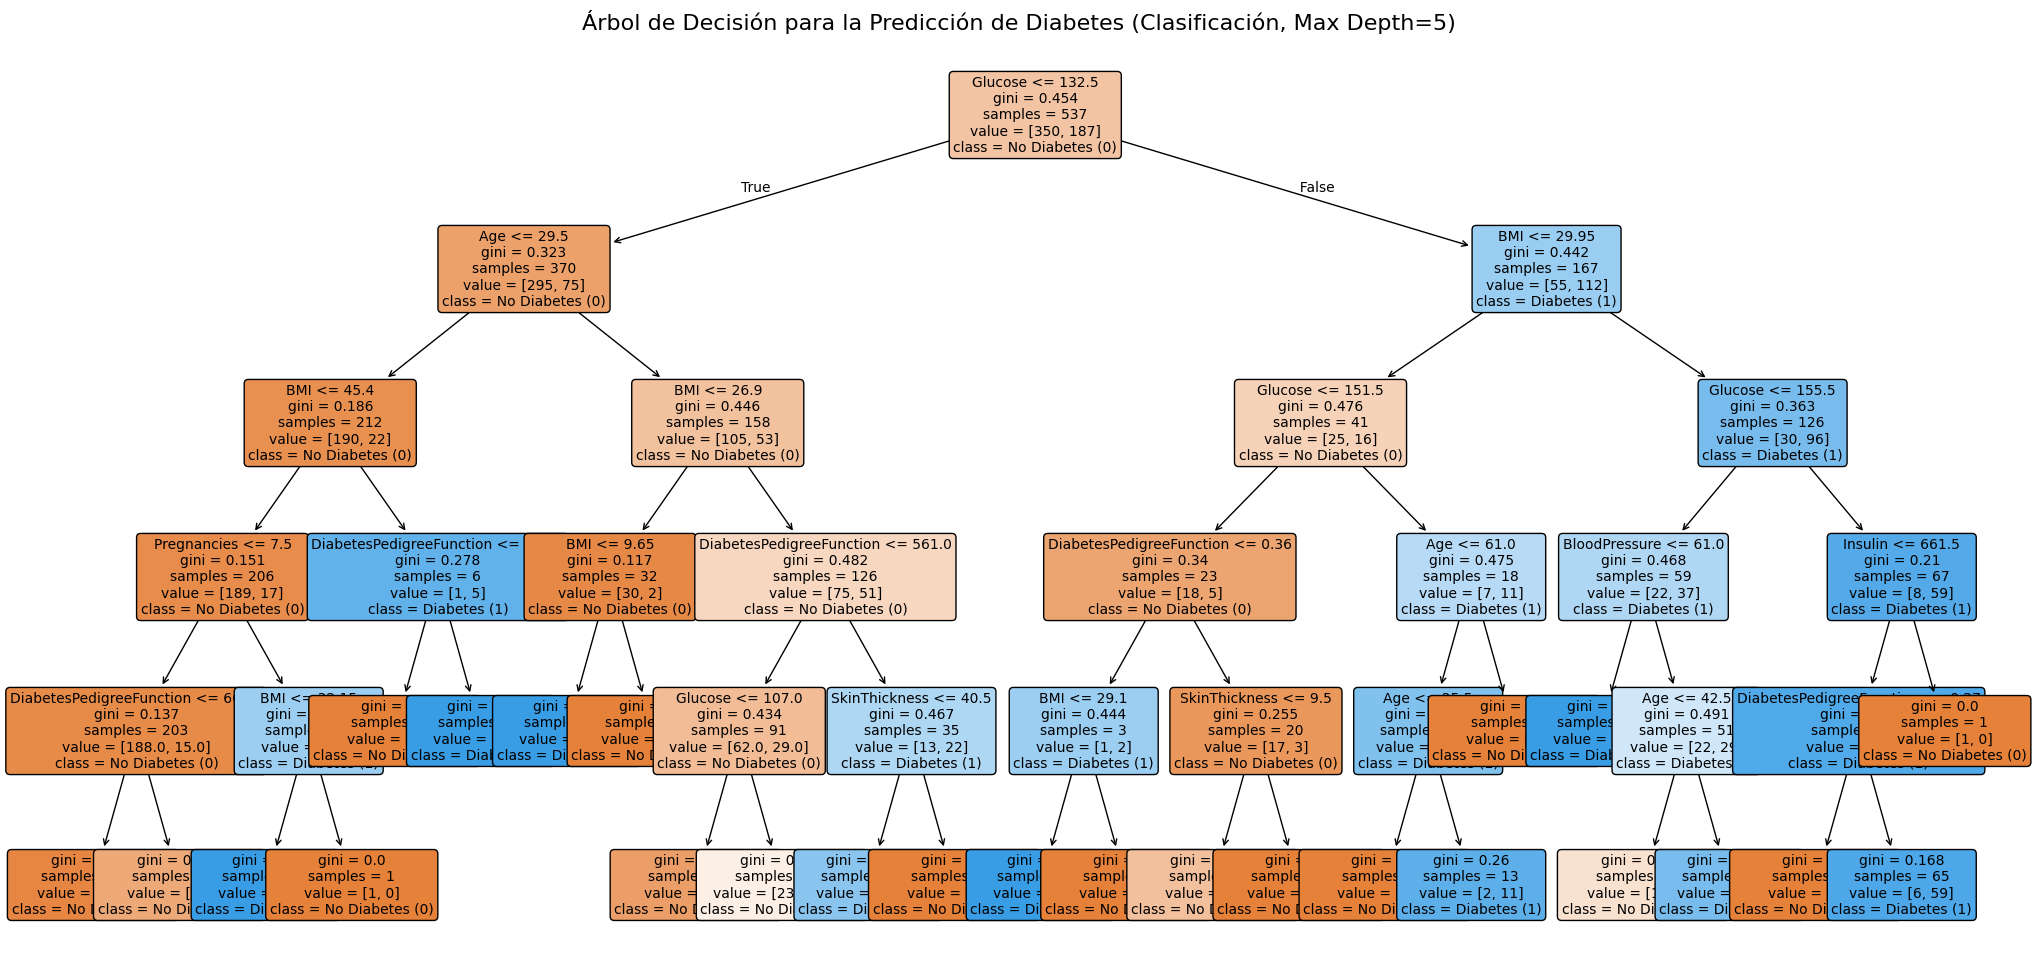

In [7]:
plt.figure(figsize=(25, 12))
plot_tree(dt_classifier,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title(f"Árbol de Decisión para la Predicción de Diabetes (Clasificación, Max Depth={dt_classifier.max_depth})", fontsize=16)
plt.show()